<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [2]:
#Write code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

In [3]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [4]:
# Find the shape
df.shape

(14999, 10)

In [5]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [7]:
# Find the basic statistics
df.describe

<bound method NDFrame.describe of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
5                    0.41             0.50               2   
6                    0.10             0.77               6   
7                    0.92             0.85               5   
8                    0.89             1.00               5   
9                    0.42             0.53               2   
10                   0.45             0.54               2   
11                   0.11             0.81               6   
12                   0.84             0.92               4   
13                   0.41             0.55               2   
14                   0.36           

In [8]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**how many employees left the company?**

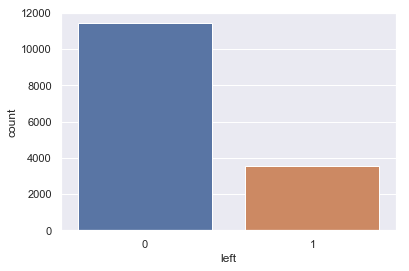

In [48]:
# Count of how many employees left the company
df['left'].value_counts()
sns.countplot(x='left', data=df)

In [10]:
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')

**Finding out the number of projects being handled.**

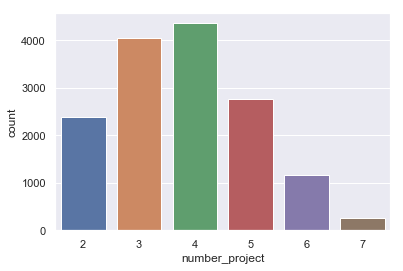

In [49]:
# Write code here
df['number_project'].value_counts()
sns.countplot(x='number_project', data=df)

*Now we want to see how number of projects contribute to employee turn-over.<br> For this purpose, we can do a groupby as shown below. The final results show the of employees leaving the company against each number of projects .*

In [54]:
df_proj=df.groupby('number_project')['left'].value_counts(normalize=True).reset_index(name='perc')
df_proj['perc']=df_proj['perc']*100

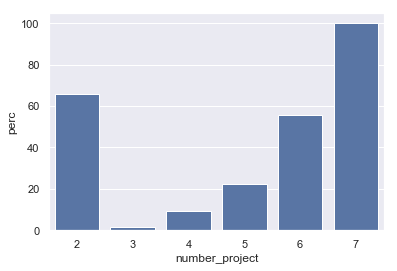

In [55]:
sns.barplot(x='number_project', y='perc', data=df_proj[df_proj['left']==1], color='b')

## **Time spent at the company**

**Finding how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

In [32]:
df_leave=df.groupby('time_spend_company')['left'].value_counts(normalize=True).reset_index(name='perc')
df_leave['perc']=df_leave['perc']*100

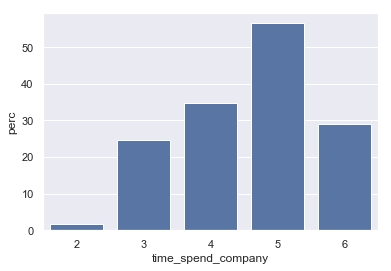

In [33]:
sns.barplot(x='time_spend_company', y='perc', data=df_leave[df_leave['left']==1], color='b')

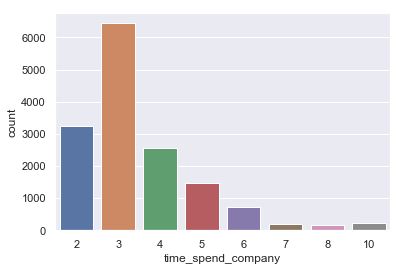

In [30]:
# Show the plot for the count of years here
sns.countplot(x='time_spend_company', data=df)

In [62]:
# Write the code here to get the percentage of employees leaving.
df_time=df.groupby('time_spend_company')['left'].value_counts(normalize=True).reset_index(name='perc')
df_time['perc']=df_time['perc']*100

In [64]:
df_time

,time_spend_company,left,perc
0,2,0,98.366215
1,2,1,1.633785
2,3,0,75.384138
3,3,1,24.615862
4,4,0,65.193586
5,4,1,34.806414
6,5,1,56.551256
7,5,0,43.448744
8,6,0,70.891365
9,6,1,29.108635


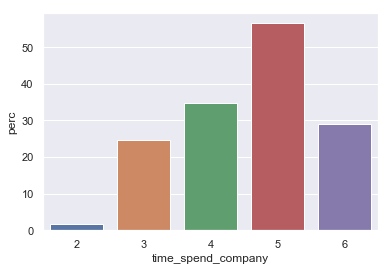

In [67]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
sns.barplot(x='time_spend_company', y='perc', data=df_time[df_time['left']==1])

## **Employees engaged in any work accident**

**Finding how many employees were engaged in work accident and how many of them actually left?**

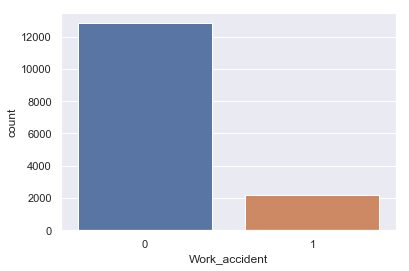

In [60]:
# Number of employees involved in work accident
sns.countplot(x='Work_accident', data=df)

In [68]:
df_work=df.groupby('Work_accident')['left'].value_counts(normalize=True).reset_index(name='perc')
df_work['perc']=df_work['perc']*100
df_work.head()

,Work_accident,left,perc
0,0,0,73.484022
1,0,1,26.515978
2,1,0,92.208391
3,1,1,7.791609


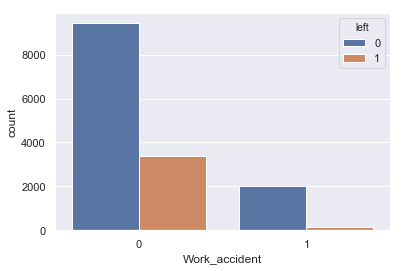

In [77]:
# Number of employees involved in work accident and left or not left
sns.countplot(x='Work_accident', hue='left', data=df)

## **Promotions in last 5 years**

**Number of employees got the promotion in last 5 year and how many of them left?**

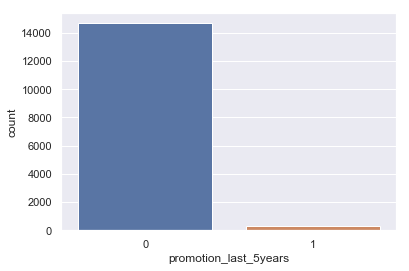

In [79]:
sns.countplot(x='promotion_last_5years', data=df)

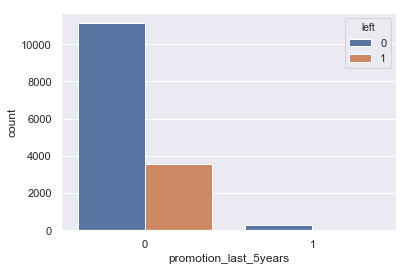

In [78]:
# Write code here
sns.countplot(x='promotion_last_5years', hue='left', data=df)

## **Salary trends**

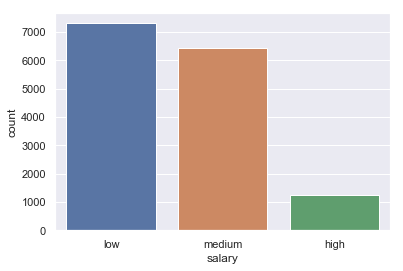

In [83]:
#Write code here
sns.countplot(x='salary',  data=df)

**Showing the percentage of employees who left according to their salaries, using a bar plot**

In [88]:
#df_sal= df['salary'].value_counts(normalize=True).reset_index(name='perc')
#df_sal
df_sal=df.groupby('salary')['left'].value_counts(normalize=True).reset_index(name='perc')
df_sal['perc']=df_sal['perc']*100
df_sal.head()

,salary,left,perc
0,high,0,93.371059
1,high,1,6.628941
2,low,0,70.311646
3,low,1,29.688354
4,medium,0,79.568725


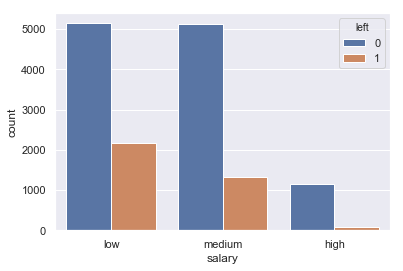

In [93]:
# Write code here for plot
sns.countplot(x='salary', hue='left', data=df)

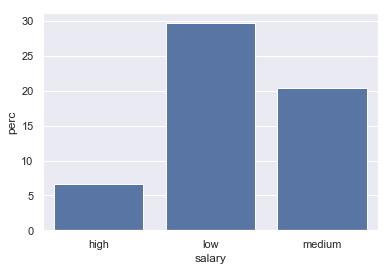

In [94]:
sns.barplot(x='salary', y='perc', data=df_sal[df_sal['left']==1], color='b')

## **Employees per Department**

**Finding employees per department and which which department has highest number of employees leaving the company.**

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64


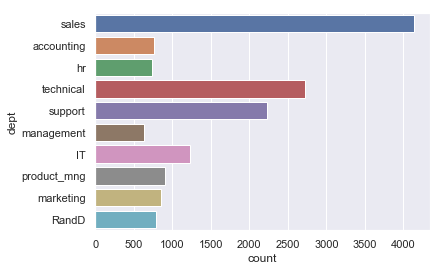

In [99]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
print(df['dept'].value_counts())
sns.countplot(y='dept', data=df)

In [102]:
df_dep= df.groupby('dept')['left'].value_counts(normalize=True).reset_index(name='perc')
df_dep


,dept,left,perc
0,IT,0,0.777506
1,IT,1,0.222494
2,RandD,0,0.846252
3,RandD,1,0.153748
4,accounting,0,0.734029
5,accounting,1,0.265971
6,hr,0,0.709066
7,hr,1,0.290934
8,management,0,0.855556
9,management,1,0.144444


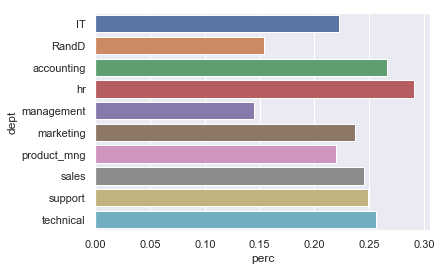

In [105]:
sns.barplot(y='dept', x='perc', data= df_dep[df_dep['left']==1])

## **Satisfaction Level**

**Showing the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

In [120]:
df_sat= df.groupby('satisfaction_level')['left'].value_counts(normalize=True).reset_index(name='perc')
df_sat


,satisfaction_level,left,perc
0,0.09,1,1.000000
1,0.10,1,1.000000
2,0.11,1,1.000000
3,0.12,0,0.866667
4,0.12,1,0.133333
5,0.13,0,0.944444
6,0.13,1,0.055556
7,0.14,0,0.863014
8,0.14,1,0.136986
9,0.15,0,0.960526


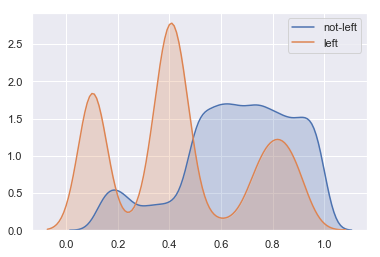

In [124]:
# Write the code here
sns.kdeplot(df[df['left'] == 0]['satisfaction_level'], shade=True,label='not-left');
sns.kdeplot(df[df['left'] == 1]['satisfaction_level'], shade=True,label='left');


# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [138]:
df.loc[df['satisfaction_level'] >= 0.5, 'satisfaction_level_type'] = 'High'
df.loc[df['satisfaction_level'] < 0.5, 'satisfaction_level_type'] = 'Low'

**Task 11: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

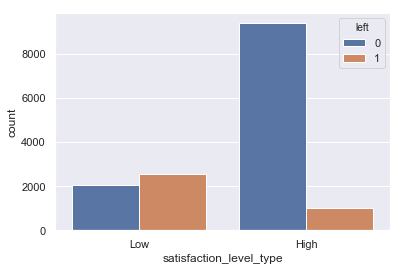

In [142]:
# Write Code Here
sns.countplot(x='satisfaction_level_type', hue='left', data=df)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking that satisfaction level type and number of projects in according to that specific type. 

In [147]:
df.loc[df['satisfaction_level_type']=='High','number_project'].value_counts()

4    3807
3    3504
5    2281
2     591
6     228
7       5
Name: number_project, dtype: int64

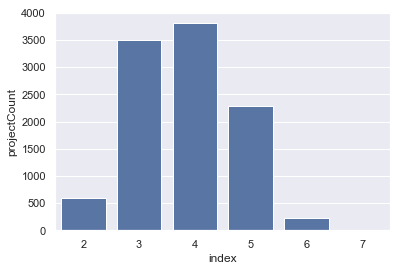

In [148]:
proj_count1= df.loc[df['satisfaction_level_type']=='High','number_project'].value_counts().reset_index(name='projectCount')
sns.barplot(x='index',y='projectCount', data=proj_count1, color='b')

As you can see that higher satisfaction level is associated with the number of projects such that number of projects per employee are in the range of 3 to 5. 

Now lets check number of projects for low satisfaction level

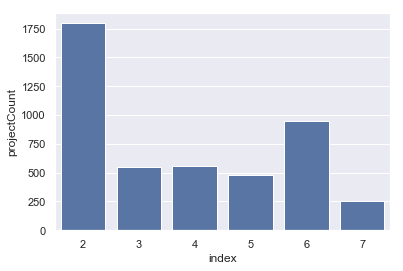

In [149]:
proj_count2= df.loc[df['satisfaction_level_type']=='Low','number_project'].value_counts().reset_index(name='projectCount')
sns.barplot(x='index',y='projectCount', data=proj_count2, color='b')

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [168]:
# Write code here

df.loc[df['number_project'] == 2, 'employee_type'] = 'unburdened'
df.loc[(df['number_project']>3)& (df['number_project']<5) , 'employee_type'] = 'Satisfactory'
df.loc[df['number_project'] >=6, 'employee_type'] = 'Burdened'


In [170]:
dfch= df.groupby('number_project')['employee_type'].value_counts(normalize=True).reset_index(name='perc')
dfch

,number_project,employee_type,perc
0,2,unburdened,1.0
1,4,Satisfactory,1.0
2,5,Satisfactory,1.0
3,6,Burdened,1.0
4,7,Burdened,1.0


**Task 13: Make a countplot to see which type of employee is leaving**

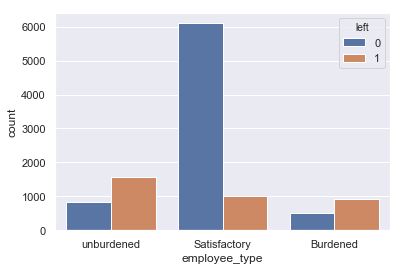

In [173]:
# Write code here
sns.countplot(x='employee_type', hue='left', data=df)

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**ONE HOT ENCODING**

In [176]:
# Write code here
df_one= pd.get_dummies(df, columns=['dept', 'salary', 'satisfaction_level_type', 'employee_type'])

**Creating Independant and Dependant Variables**

In [178]:
df_one.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,satisfaction_level_type_High,satisfaction_level_type_Low,employee_type_Burdened,employee_type_Satisfactory,employee_type_unburdened
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [180]:
df_one.shape

(14999, 26)

In [179]:
# Write code here
X=df_one.drop(['left', 'last_evaluation', ], axis=1)
Y=df_one['left']
print(X.shape, Y.shape)

(14999, 24) (14999,)


In [185]:
Y.dtype

dtype('int64')

**Train Test Split with test size 30 percent and random state = 100**

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
#Write code here
xtrain, xtest, ytrain, ytest= train_test_split(X,Y,test_size=0.3, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 24) (10499,)
(4500, 24) (4500,)


**Predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
<br> 

**Getting the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [188]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier


In [189]:
# Making instance and training the model
clf_rf = RandomForestClassifier(random_state=100, n_estimators=100)
clf_rf.fit(xtrain, ytrain)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [190]:
# Get predictions

rf_pred=clf_rf.predict(xtest)

**Precision**

In [193]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [196]:
#Write the code to calculate
rf_precision= precision_score(ytest, rf_pred)
print("Precision: {}".format(rf_precision))

Precision: 0.9843462246777164


**Accuracy**

In [197]:
# Write the code to calculate
rf_acc=accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(rf_acc))

Recall: 0.9895555555555555


**Recall**

In [198]:
# Write the code to calculate
rf_recall=recall_score(ytest,rf_pred)
print("Recall: {}".format(rf_recall))

Recall: 0.9727024567788899


**F1-Score**

In [200]:
# Write the code to calculate
rf_f1_score=f1_score(ytest,rf_pred)
print("F1-score: {}".format(rf_f1_score))

Recall: 0.9784897025171626


**Classification Report**

In [205]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.98      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [203]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [207]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=25)
lr_model.fit(xtrain,ytrain)

C:\Users\haier pc\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=25, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
# get the predictions
lr_pred=lr_model.predict(xtest)

**Accuracy**

In [209]:
#Write the code here
lr_accuracy=accuracy_score(ytest, lr_pred)
lr_accuracy

0.862

**Precision**

In [210]:
#Write the code here
lr_precision=precision_score(ytest, lr_pred)
lr_precision

0.735236220472441

**Recall**

In [211]:
#Write the code here
lr_recall=recall_score(ytest, lr_pred)
lr_recall

0.6797088262056415

**F1 Score**

In [212]:
#Write the code here
lr_f1_score=f1_score(ytest, lr_pred)
lr_f1_score

0.7063829787234043

**Classification Report**

In [214]:
#Write the code here
print(classification_report(ytest, lr_pred))


              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3401
           1       0.74      0.68      0.71      1099

    accuracy                           0.86      4500
   macro avg       0.82      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [215]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [216]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [217]:
# Get the predictions
pred_clf_adb=clf_adb.predict(xtest)

**Accuracy**

In [218]:
#Write code here
ab_accuracy= accuracy_score(ytest, pred_clf_adb)
ab_accuracy

0.96

**Precision**

In [219]:
#Write code here
ab_precision= precision_score(ytest, pred_clf_adb)
ab_precision

0.922723091076357

**Recall**

In [220]:
#Write code here
ab_recall= recall_score(ytest, pred_clf_adb)
ab_recall

0.9126478616924477

**F1-Score**

In [221]:
#Write code here
ab_f1_score= f1_score(ytest, pred_clf_adb)
ab_f1_score

0.9176578225068619

**Classification Report**

In [222]:
#Write code here
print(classification_report(ytest, pred_clf_adb))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3401
           1       0.92      0.91      0.92      1099

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500



# Result Comparisons

**The comparison of the above used models as per the scores found. Make a datafram that shows the models and scores for each models.**

In [224]:
# Write the code here
comparison_dict = {"Algorithm": ["Random Forest", "Logistic Regression", "Ada Boost"],
                   "Accuracy": [ rf_acc, lr_accuracy, ab_accuracy],
                   "Precision": [rf_precision, lr_precision, ab_precision],
                   "Recall": [ rf_recall, lr_recall, ab_recall],
                   "F1 Score": [ rf_f1_score, lr_f1_score,ab_f1_score]
                   }

In [225]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'Precision'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.989556,0.984346,0.972702,0.978490
2,Ada Boost,0.960000,0.922723,0.912648,0.917658
1,Logistic Regression,0.862000,0.735236,0.679709,0.706383
